In [172]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [98]:
data=pd.read_csv('region25.csv')
data

brand             name       bodyType     color fuelType  \
0                Fiat       124 Spider       Открытый     Синий   Бензин   
1                 BMW               i3  Хэтчбек 5 дв.    Черный  Электро   
2       Mercedes-Benz        GLE Coupe     Джип 5 дв.  Бордовый   Бензин   
3       Mercedes-Benz          G-Class     Джип 5 дв.    Черный   Бензин   
4                Audi               Q7     Джип 5 дв.     Белый   Бензин   
...               ...              ...            ...       ...      ...   
611435         Toyota      Prius Alpha        Минивэн       NaN   Бензин   
611436     Volkswagen             Golf  Хэтчбек 5 дв.    Желтый   Бензин   
611437         Toyota  Corolla Fielder      Универсал     Серый   Бензин   
611438          Lexus            GS350          Седан     Белый   Бензин   
611439         Subaru         Forester     Джип 5 дв.     Синий   Бензин   

          year   mileage transmission  power    price  \
0          NaN    8000.0      Автомат    NaN  1830000   
1          NaN   12000.0      Автомат    NaN  1830000   
2       2015.0   57000.0         АКПП  367.0  4600000   
3       2002.0  200000.0         АКПП  296.0  2999999   
4          NaN   67000.0      Автомат  252.0  3300000   
...        ...       ...          ...    ...      ...   
611435  2011.0  120000.0     Вариатор   99.0  1050000   
611436  2017.0   54000.0        Робот  140.0  1099000   
611437  2002.0  250000.0         АКПП  109.0   365000   
611438  2007.0  115000.0         АКПП  315.0   495000   
611439  1998.0   90000.0         АКПП  137.0   310000   

                    vehicleConfiguration      engineName engineDisplacement  \
0                                    NaN             NaN                NaN   
1                                    NaN             NaN                NaN   
2            450 AMG 4MATIC Особая серия  M 276 DE 30 AL            3.0 LTR   
3                                  G 500      M 113 E 50            5.0 LTR   
4                                    NaN             NaN                NaN   
...                                  ...             ...                ...   
611435  1.8 G Touring selection 5 seater         2ZR-FXE            1.8 LTR   
611436                  1.4 TSI Highline             CPT            1.4 LTR   
611437                             1.5 X          1NZ-FE            1.5 LTR   
611438                     350 version I         2GR-FSE            3.5 LTR   
611439                          2.0 S/20            EJ20            2.0 LTR   

                       date     location  \
0       2022-08-20 00:00:00  Владивосток   
1       2022-08-20 00:00:00  Владивосток   
2       2022-08-20 00:00:00  Владивосток   
3       2022-08-20 00:00:00  Владивосток   
4       2022-08-20 00:00:00  Владивосток   
...                     ...          ...   
611435  2022-09-02 00:00:00  Владивосток   
611436  2022-09-02 00:00:00  Владивосток   
611437  2022-09-02 00:00:00  Лесозаводск   
611438  2022-09-02 00:00:00  Владивосток   
611439  2022-09-02 00:00:00  Владивосток   

                                                     link  \
0       https://vladivostok.drom.ru/fiat/124_spider/47...   
1        https://vladivostok.drom.ru/bmw/i3/47958301.html   
2       https://vladivostok.drom.ru/mercedes-benz/gle_...   
3       https://vladivostok.drom.ru/mercedes-benz/g-cl...   
4       https://vladivostok.drom.ru/audi/q7/46498184.html   
...                                                   ...   
611435  https://vladivostok.drom.ru/toyota/prius_a/477...   
611436  https://vladivostok.drom.ru/volkswagen/golf/46...   
611437  https://lesozavodsk.drom.ru/toyota/corolla_fie...   
611438  https://vladivostok.drom.ru/lexus/gs350/481058...   
611439  https://vladivostok.drom.ru/subaru/forester/47...   

                                              description           parse_date  
0       Только сегодня с таможни забрали Как новый! Кр...  2022-08-20 04:00:00  
1       Электричка +двс V-600cc ,как новая BM

In [99]:
df=pd.DataFrame(data)
df

brand             name       bodyType     color fuelType  \
0                Fiat       124 Spider       Открытый     Синий   Бензин   
1                 BMW               i3  Хэтчбек 5 дв.    Черный  Электро   
2       Mercedes-Benz        GLE Coupe     Джип 5 дв.  Бордовый   Бензин   
3       Mercedes-Benz          G-Class     Джип 5 дв.    Черный   Бензин   
4                Audi               Q7     Джип 5 дв.     Белый   Бензин   
...               ...              ...            ...       ...      ...   
611435         Toyota      Prius Alpha        Минивэн       NaN   Бензин   
611436     Volkswagen             Golf  Хэтчбек 5 дв.    Желтый   Бензин   
611437         Toyota  Corolla Fielder      Универсал     Серый   Бензин   
611438          Lexus            GS350          Седан     Белый   Бензин   
611439         Subaru         Forester     Джип 5 дв.     Синий   Бензин   

          year   mileage transmission  power    price  \
0          NaN    8000.0      Автомат    NaN  1830000   
1          NaN   12000.0      Автомат    NaN  1830000   
2       2015.0   57000.0         АКПП  367.0  4600000   
3       2002.0  200000.0         АКПП  296.0  2999999   
4          NaN   67000.0      Автомат  252.0  3300000   
...        ...       ...          ...    ...      ...   
611435  2011.0  120000.0     Вариатор   99.0  1050000   
611436  2017.0   54000.0        Робот  140.0  1099000   
611437  2002.0  250000.0         АКПП  109.0   365000   
611438  2007.0  115000.0         АКПП  315.0   495000   
611439  1998.0   90000.0         АКПП  137.0   310000   

                    vehicleConfiguration      engineName engineDisplacement  \
0                                    NaN             NaN                NaN   
1                                    NaN             NaN                NaN   
2            450 AMG 4MATIC Особая серия  M 276 DE 30 AL            3.0 LTR   
3                                  G 500      M 113 E 50            5.0 LTR   
4                                    NaN             NaN                NaN   
...                                  ...             ...                ...   
611435  1.8 G Touring selection 5 seater         2ZR-FXE            1.8 LTR   
611436                  1.4 TSI Highline             CPT            1.4 LTR   
611437                             1.5 X          1NZ-FE            1.5 LTR   
611438                     350 version I         2GR-FSE            3.5 LTR   
611439                          2.0 S/20            EJ20            2.0 LTR   

                       date     location  \
0       2022-08-20 00:00:00  Владивосток   
1       2022-08-20 00:00:00  Владивосток   
2       2022-08-20 00:00:00  Владивосток   
3       2022-08-20 00:00:00  Владивосток   
4       2022-08-20 00:00:00  Владивосток   
...                     ...          ...   
611435  2022-09-02 00:00:00  Владивосток   
611436  2022-09-02 00:00:00  Владивосток   
611437  2022-09-02 00:00:00  Лесозаводск   
611438  2022-09-02 00:00:00  Владивосток   
611439  2022-09-02 00:00:00  Владивосток   

                                                     link  \
0       https://vladivostok.drom.ru/fiat/124_spider/47...   
1        https://vladivostok.drom.ru/bmw/i3/47958301.html   
2       https://vladivostok.drom.ru/mercedes-benz/gle_...   
3       https://vladivostok.drom.ru/mercedes-benz/g-cl...   
4       https://vladivostok.drom.ru/audi/q7/46498184.html   
...                                                   ...   
611435  https://vladivostok.drom.ru/toyota/prius_a/477...   
611436  https://vladivostok.drom.ru/volkswagen/golf/46...   
611437  https://lesozavodsk.drom.ru/toyota/corolla_fie...   
611438  https://vladivostok.drom.ru/lexus/gs350/481058...   
611439  https://vladivostok.drom.ru/subaru/forester/47...   

                                              description           parse_date  
0       Только сегодня с таможни забрали Как новый! Кр...  2022-08-20 04:00:00  
1       Электричка +двс V-600cc ,как новая BM

In [100]:
#خب این فانکشن که اینجا نوشتم میاد و تک تک ستون ها رو بررسی میکنه و اسمشون و نوع و تعداد داده های یونیک و میزان میسینگ ولیو رو یهو به صورت قلمبه بهمون نشون میده

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [101]:
check(df)

column   dtypes  nunique  sum_null
0                  brand   object       67         0
1                   name   object      884         0
2               bodyType   object       11         0
3                  color   object       16     43768
4               fuelType   object        3      1383
5                   year  float64       54    164022
6                mileage  float64      483      5377
7           transmission   object        5      1226
8                  power  float64      323      9139
9                  price    int64     2037         0
10  vehicleConfiguration   object     5620    164022
11            engineName   object      897    164372
12    engineDisplacement   object       53    168121
13                  date   object       16         0
14              location   object       69         0
15                  link   object    24757         0
16           description   object    28790     14909
17            parse_date   object      307         0

In [102]:
df1=df.copy()

In [103]:
# ستون های بدرد نخور و یا با تعداد بسیار زیاد میس ولیو را کامل حذف میکنیم... چه کاریه اصلا


df1.drop(columns=['year','vehicleConfiguration','engineName','engineDisplacement','link','description','parse_date','date','location'],axis=1,inplace=True)
df1

brand             name       bodyType     color fuelType  \
0                Fiat       124 Spider       Открытый     Синий   Бензин   
1                 BMW               i3  Хэтчбек 5 дв.    Черный  Электро   
2       Mercedes-Benz        GLE Coupe     Джип 5 дв.  Бордовый   Бензин   
3       Mercedes-Benz          G-Class     Джип 5 дв.    Черный   Бензин   
4                Audi               Q7     Джип 5 дв.     Белый   Бензин   
...               ...              ...            ...       ...      ...   
611435         Toyota      Prius Alpha        Минивэн       NaN   Бензин   
611436     Volkswagen             Golf  Хэтчбек 5 дв.    Желтый   Бензин   
611437         Toyota  Corolla Fielder      Универсал     Серый   Бензин   
611438          Lexus            GS350          Седан     Белый   Бензин   
611439         Subaru         Forester     Джип 5 дв.     Синий   Бензин   

         mileage transmission  power    price  
0         8000.0      Автомат    NaN  1830000  
1        12000.0      Автомат    NaN  1830000  
2        57000.0         АКПП  367.0  4600000  
3       200000.0         АКПП  296.0  2999999  
4        67000.0      Автомат  252.0  3300000  
...          ...          ...    ...      ...  
611435  120000.0     Вариатор   99.0  1050000  
611436   54000.0        Робот  140.0  1099000  
611437  250000.0         АКПП  109.0   365000  
611438  115000.0         АКПП  315.0   495000  
611439   90000.0         АКПП  137.0   310000  

[611440 rows x 9 columns]

In [104]:
#بریم ببینیم توی نوع بدنه ماشین هامون چندتا تیپ داده داریم کلا

df1.bodyType.unique()

array(['Открытый', 'Хэтчбек 5 дв.', 'Джип 5 дв.', 'Минивэн', 'Лифтбек',
       'Седан', 'Джип 3 дв.', 'Универсал', 'Купе', 'Пикап',
       'Хэтчбек 3 дв.'], dtype=object)

In [105]:
df1.sort_values('price')

brand     name       bodyType   color fuelType    mileage  \
305767         Subaru    Justy  Хэтчбек 5 дв.   Белый   Бензин  1000000.0   
60816            Лада     2101          Седан     NaN      NaN   100000.0   
307847         Subaru    Justy  Хэтчбек 5 дв.   Белый   Бензин  1000000.0   
338714         Subaru    Justy  Хэтчбек 5 дв.   Белый   Бензин  1000000.0   
46482            Лада     2101          Седан     NaN      NaN   100000.0   
...               ...      ...            ...     ...      ...        ...   
402768  Mercedes-Benz  G-Class     Джип 5 дв.  Черный   Бензин     8000.0   
423222  Mercedes-Benz  G-Class     Джип 5 дв.  Черный   Бензин     8000.0   
421240  Mercedes-Benz  G-Class     Джип 5 дв.  Черный   Бензин     8000.0   
406974  Mercedes-Benz  G-Class     Джип 5 дв.  Черный   Бензин     8000.0   
438102  Mercedes-Benz  G-Class     Джип 5 дв.  Черный   Бензин     8000.0   

       transmission  power     price  
305767     Механика   56.0     15000  
60816           NaN    NaN     15000  
307847     Механика   56.0     15000  
338714     Механика   56.0     15000  
46482           NaN    NaN     15000  
...             ...    ...       ...  
402768         АКПП  585.0  41500000  
423222         АКПП  585.0  41500000  
421240         АКПП  585.0  41500000  
406974         АКПП  585.0  41500000  
438102         АКПП  585.0  41500000  

[611440 rows x 9 columns]

In [106]:
# bodyType ترجمه داده های ستون

#Открытый = باز کن
#Хэтчбек 5 дв = هاچ بک 5 در
#Джип 5 дв = جیپ 5 در
#Минивэн = مینی ون
#Лифтбек = لیفت بک
#Седан = سدان
#Джип 3 дв = جیپ 3 در
#Универсал = استیشن واگن
#Купе = کوچه
#Пикап = سوار کردن
#Хэтчбек 3 дв = هاچ بک 3 در
#--------------------------------------------------



In [107]:
df1.color.unique()

array(['Синий', 'Черный', 'Бордовый', 'Белый', nan, 'Серый', 'Красный',
       'Коричневый', 'Серебристый', 'Желтый', 'Фиолетовый', 'Голубой',
       'Зеленый', 'Золотистый', 'Оранжевый', 'Розовый', 'Бежевый'],
      dtype=object)

In [108]:
# color ترجمه داده های ستون


#Синий = آبی
#Черный = مشکی
#Бордовый = بورگوندی
#Белый = سفید
#Серый = خاکستری
#Красный = قرمز
#Коричневый = قهوه ای
#Серебристый = نقره ای
#Желтый = زرد
#Фиолетовый = بنفش
#Голубой = آبی
#Зеленый = سبز
#Золотистый = طلایی
#Оранжевый = نارنجی
#Розовый = صروتی
#Бежевый = بژ

In [109]:
df1.fuelType.unique()

array(['Бензин', 'Электро', 'Дизель', nan], dtype=object)

In [110]:
# fuelType ترجمه داده های ستون


#Бензин = بنزین
#Электро = برقی
#Дизель = دیزل

In [111]:
df1.isnull().sum()

brand               0
name                0
bodyType            0
color           43768
fuelType         1383
mileage          5377
transmission     1226
power            9139
price               0
dtype: int64

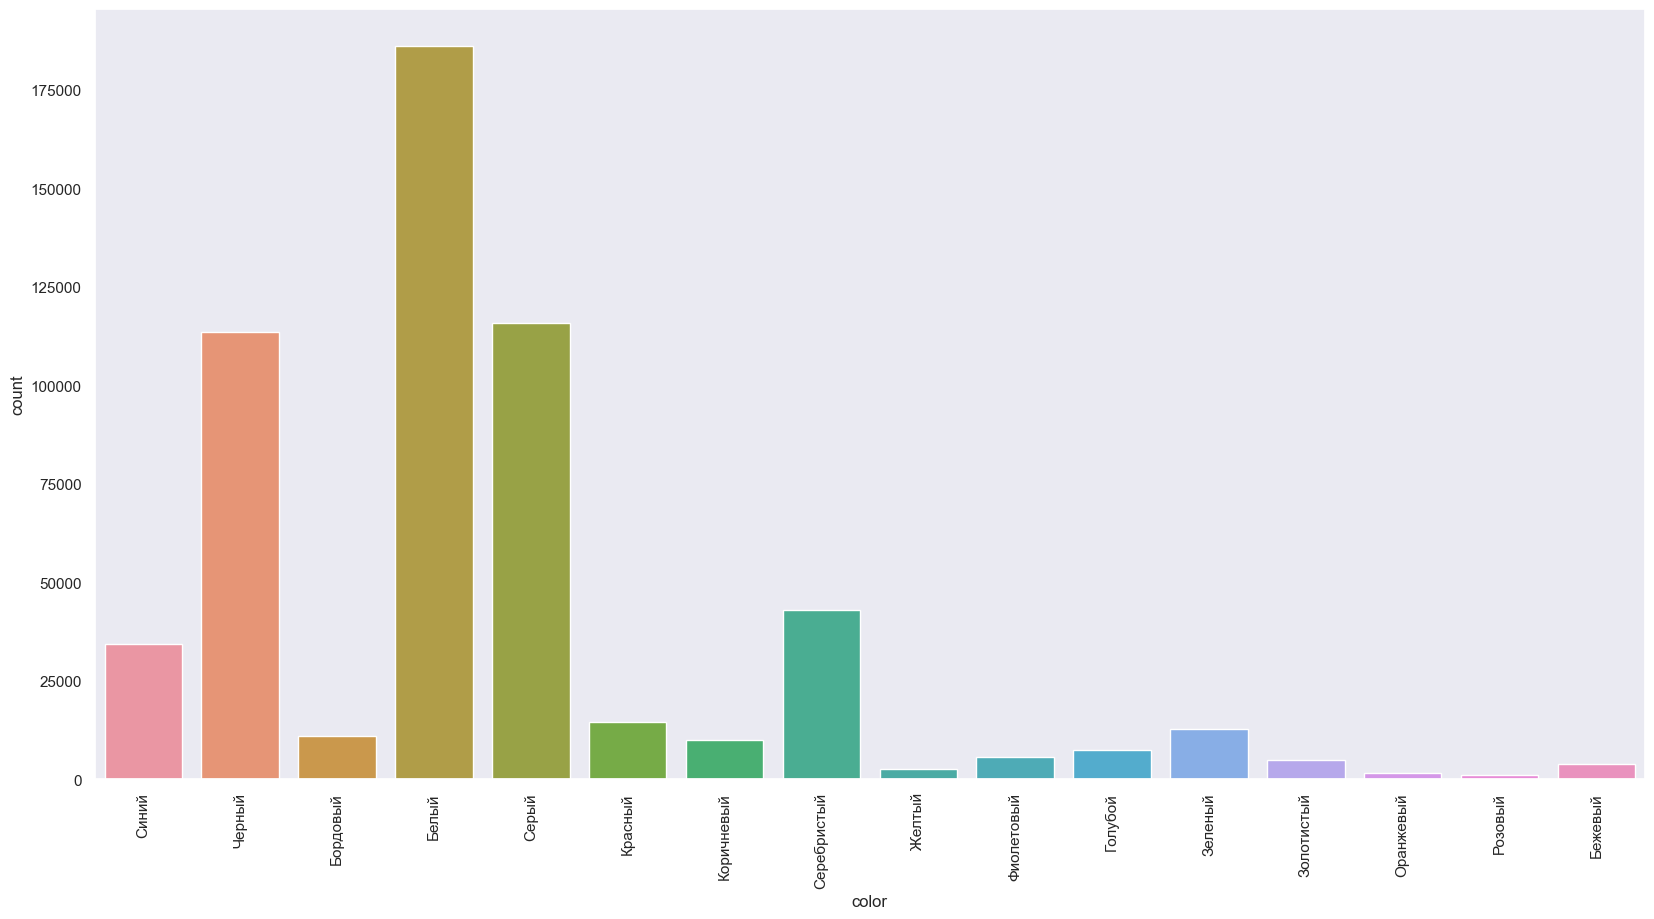

In [112]:
sns.countplot(data=df1,x="color")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

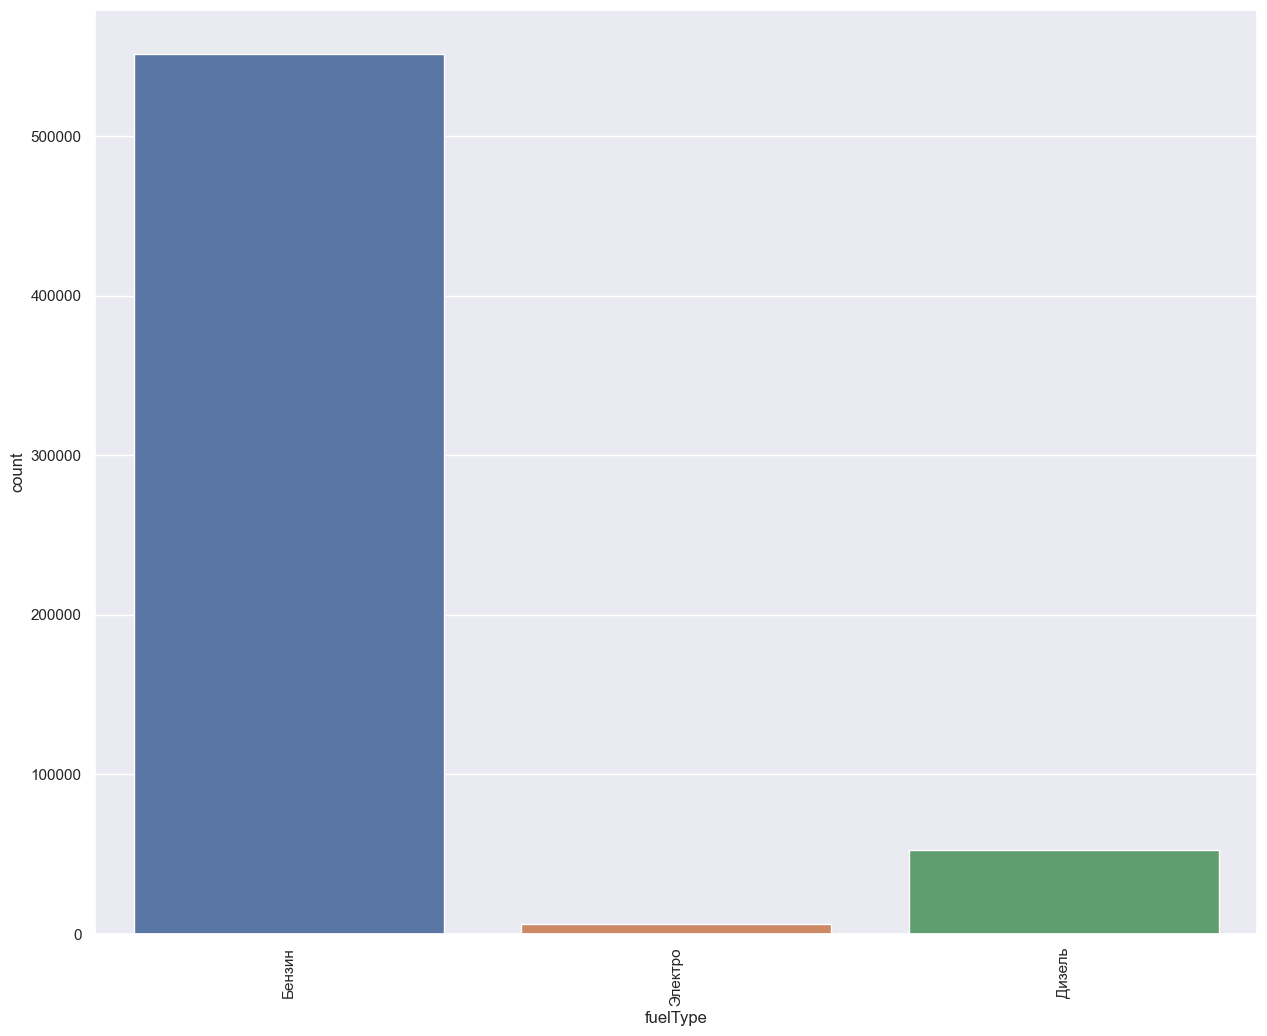

In [113]:
sns.countplot(data=df1,x="fuelType")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

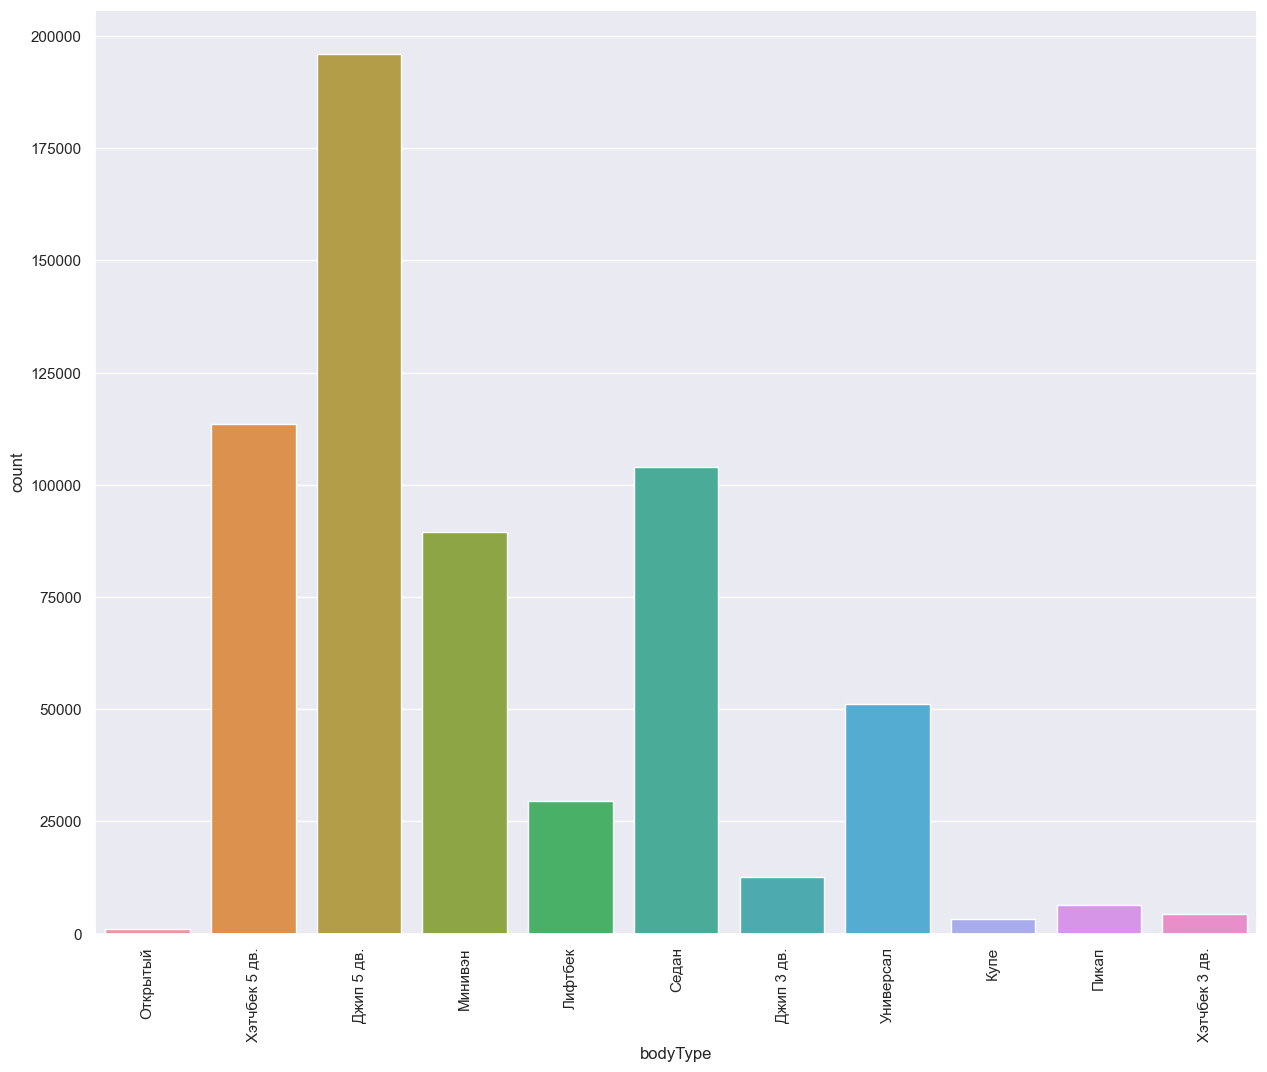

In [114]:
sns.countplot(data=df1,x="bodyType")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

# به نظر میرسه این روس ها به جیپ پنج خیلی علاقه دارن

In [115]:
#خب دیگه اینجا میخوام داده هایی که نیستن رو پر کنیم واسه همین با توجه به پلات های بالا اون چیزی که بیشتر از همه بوده رو میذاریم جاشون
df1["color"].fillna("Белый", inplace = True)

In [116]:
df1["fuelType"].fillna("Бензин", inplace = True)

In [117]:
#اینم گذاشتم که نگید بلد نبود یه حلقه بنویسه ... من عادت دارم کلا واسه کنترل بیشتر همه کد ها رو دستی میزنم تا بیشتر بتونم هر ستون رو کنترل کنم
#توی این کد هم همه ستون ها با مود داده ستون پر شد
#واسه کسانی که نمیدونن باید بگم مود یعنی داده ای که بیشترین تکرار رو داشته!

for i in df1.columns:
 df1[i].fillna(df1[i].mode()[0], inplace=True)
df1

brand             name       bodyType     color fuelType  \
0                Fiat       124 Spider       Открытый     Синий   Бензин   
1                 BMW               i3  Хэтчбек 5 дв.    Черный  Электро   
2       Mercedes-Benz        GLE Coupe     Джип 5 дв.  Бордовый   Бензин   
3       Mercedes-Benz          G-Class     Джип 5 дв.    Черный   Бензин   
4                Audi               Q7     Джип 5 дв.     Белый   Бензин   
...               ...              ...            ...       ...      ...   
611435         Toyota      Prius Alpha        Минивэн     Белый   Бензин   
611436     Volkswagen             Golf  Хэтчбек 5 дв.    Желтый   Бензин   
611437         Toyota  Corolla Fielder      Универсал     Серый   Бензин   
611438          Lexus            GS350          Седан     Белый   Бензин   
611439         Subaru         Forester     Джип 5 дв.     Синий   Бензин   

         mileage transmission  power    price  
0         8000.0      Автомат   99.0  1830000  
1        12000.0      Автомат   99.0  1830000  
2        57000.0         АКПП  367.0  4600000  
3       200000.0         АКПП  296.0  2999999  
4        67000.0      Автомат  252.0  3300000  
...          ...          ...    ...      ...  
611435  120000.0     Вариатор   99.0  1050000  
611436   54000.0        Робот  140.0  1099000  
611437  250000.0         АКПП  109.0   365000  
611438  115000.0         АКПП  315.0   495000  
611439   90000.0         АКПП  137.0   310000  

[611440 rows x 9 columns]

In [118]:
df1.isnull().sum()

#خب دیگه خدا رو شکر از شر این میسینگ ولیو ها خلاص شدیم پس حالا میتونیم بریم یه نگاه به داده هامون بندازیم 

brand           0
name            0
bodyType        0
color           0
fuelType        0
mileage         0
transmission    0
power           0
price           0
dtype: int64

## :مصور سازی داده ها
## Visualization:

In [119]:
df2=df1.copy()
df2.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'mileage',
       'transmission', 'power', 'price'],
      dtype='object')

In [120]:
df2['bodyType'].replace({'Открытый':'Open','Хэтчбек 5 дв.':'Hatchback 5 doors','Джип 5 дв.':'Jeep 5 doors','Минивэн':'Minivan','Лифтбек':'liftback','Седан':'Sedan','Джип 3 дв.':'Jeep 3 doors','Универсал':'station wagon','Купе':'coupe','Пикап':'Pickup','Хэтчбек 3 дв.':'Hatchback 3 door'},inplace=True)
df2.bodyType.unique()

array(['Open', 'Hatchback 5 doors', 'Jeep 5 doors', 'Minivan', 'liftback',
       'Sedan', 'Jeep 3 doors', 'station wagon', 'coupe', 'Pickup',
       'Hatchback 3 door'], dtype=object)

In [121]:
df2['color'].replace({'Синий':'Blue','Черный':'Black','Бордовый':'burgundy','Белый':'White','Серый':'Grey','Красный':'Red','Коричневый':'Brown','Серебристый':'Silver','Желтый':'Yellow','Фиолетовый':'Violet','Голубой':'Blue','Зеленый':'Green','Золотистый':'Golden','Оранжевый':'Orange','Розовый':'Pink','Бежевый':'Beige'},inplace=True)
df2.color.unique()

array(['Blue', 'Black', 'burgundy', 'White', 'Grey', 'Red', 'Brown',
       'Silver', 'Yellow', 'Violet', 'Green', 'Golden', 'Orange', 'Pink',
       'Beige'], dtype=object)

In [122]:
df2['fuelType'].replace({'Бензин':'Petrol','Электро':'Electro','Дизель':'Diesel'},inplace=True)
df2.fuelType.unique()


array(['Petrol', 'Electro', 'Diesel'], dtype=object)

In [123]:
df2['transmission'].replace({'Автомат':'Machine','АКПП':'automatic transmission','Вариатор':'Variable speed drive','Робот':'Robot','Механика':'Mechanics',},inplace=True)
df2.transmission.unique()


array(['Machine', 'automatic transmission', 'Variable speed drive',
       'Robot', 'Mechanics'], dtype=object)

In [124]:
df2.head()

brand        name           bodyType     color fuelType   mileage  \
0           Fiat  124 Spider               Open      Blue   Petrol    8000.0   
1            BMW          i3  Hatchback 5 doors     Black  Electro   12000.0   
2  Mercedes-Benz   GLE Coupe       Jeep 5 doors  burgundy   Petrol   57000.0   
3  Mercedes-Benz     G-Class       Jeep 5 doors     Black   Petrol  200000.0   
4           Audi          Q7       Jeep 5 doors     White   Petrol   67000.0   

             transmission  power    price  
0                 Machine   99.0  1830000  
1                 Machine   99.0  1830000  
2  automatic transmission  367.0  4600000  
3  automatic transmission  296.0  2999999  
4                 Machine  252.0  3300000

In [125]:
#خیلی خب حالا همه اون کلمات روسی رو تبدیل به انگلیسی کردیم تا برامون قابل درک تر باشه... پس بریم ببینیم چه خبره

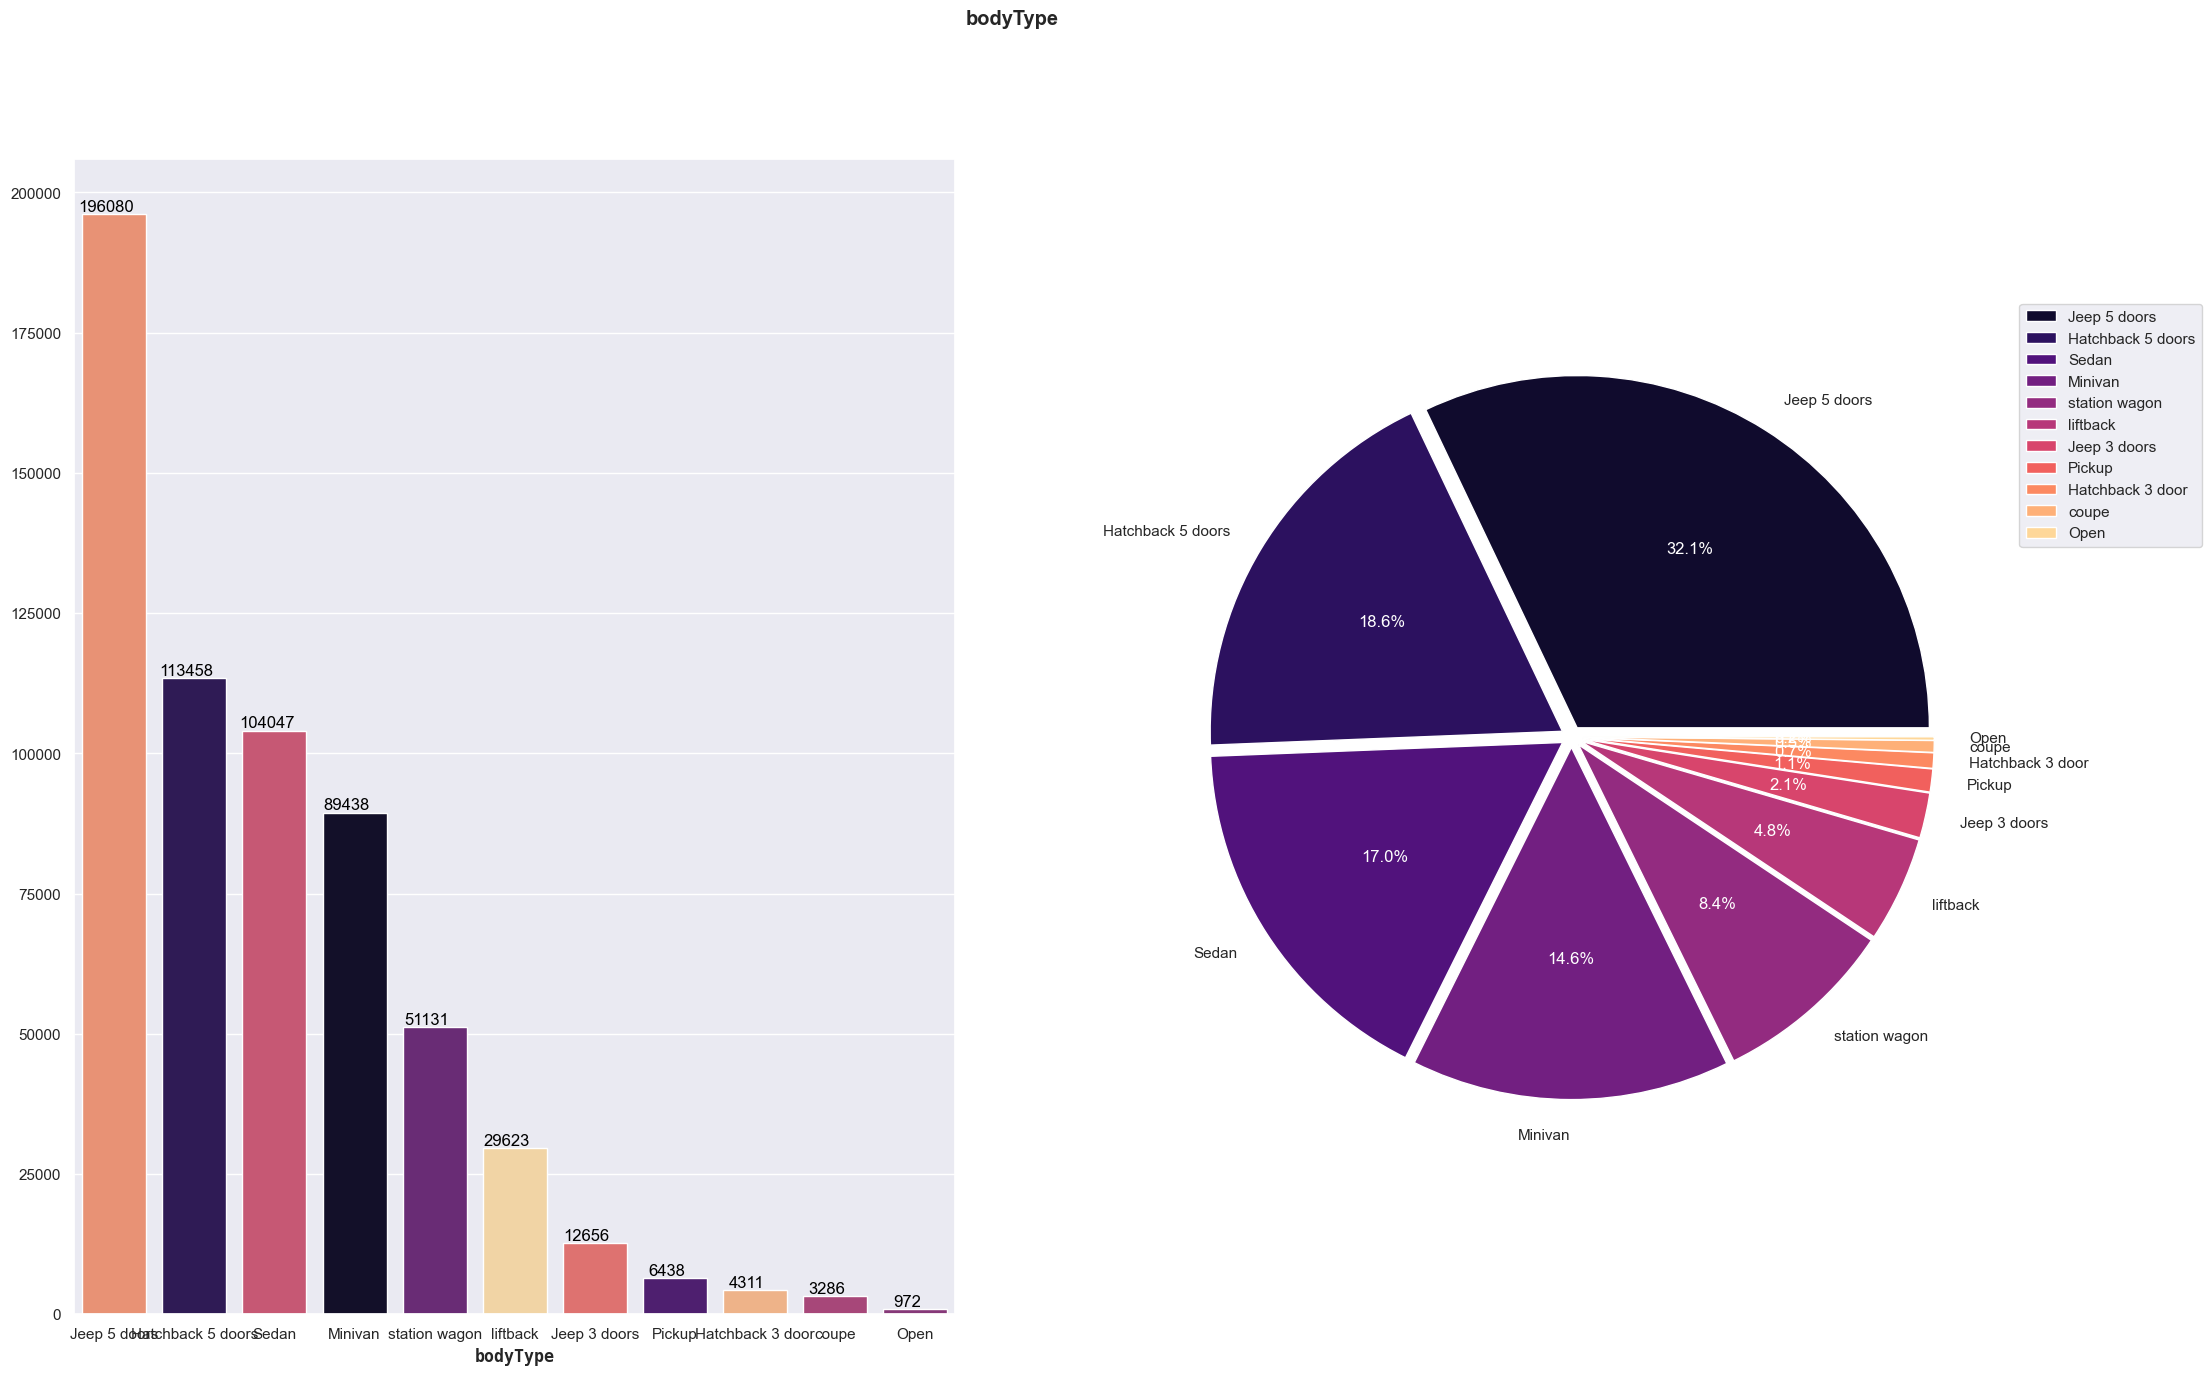

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
x=df2['bodyType'].value_counts().index
y=df2['bodyType'].value_counts().values.tolist()
data = df2.groupby("bodyType").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('bodyType', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df2['bodyType'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('bodyType',weight = 'bold')
plt.show()

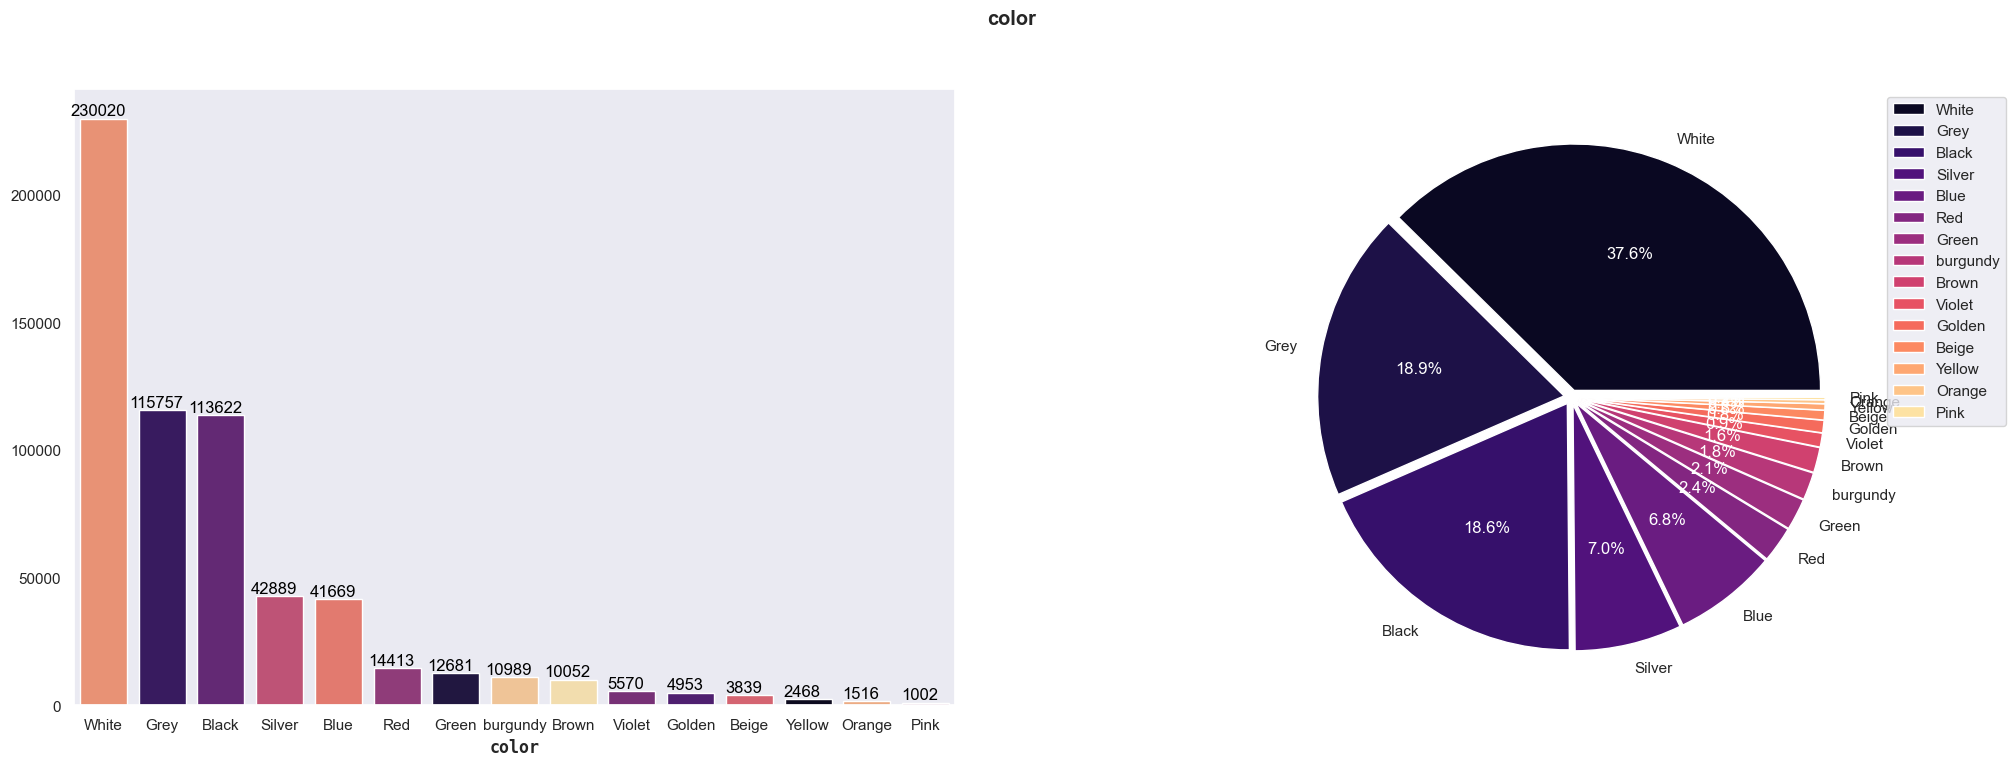

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(25,8))
x=df2['color'].value_counts().index
y=df2['color'].value_counts().values.tolist()
data = df2.groupby("color").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('color', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df2['color'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('color',weight = 'bold')
plt.show()

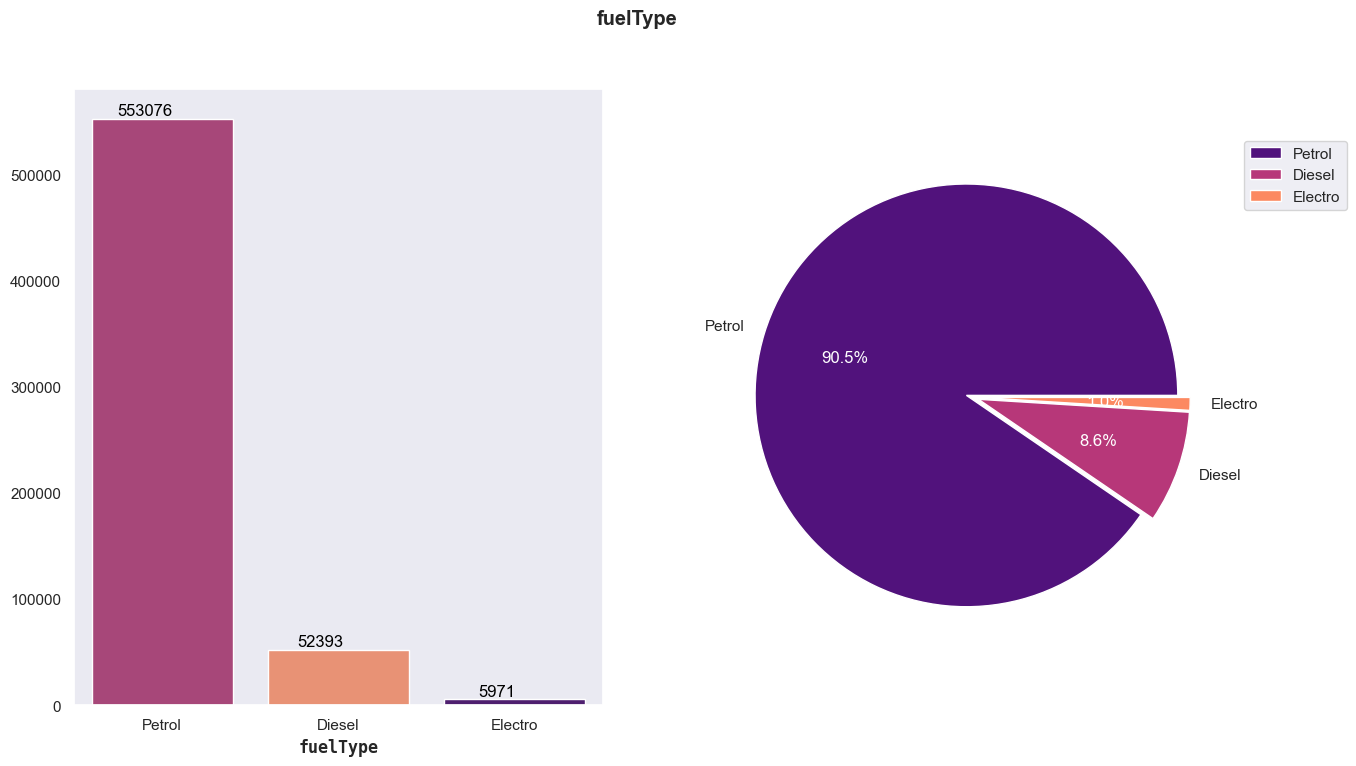

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df2['fuelType'].value_counts().index
y=df2['fuelType'].value_counts().values.tolist()
data = df2.groupby("fuelType").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('fuelType', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df2['fuelType'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('fuelType',weight = 'bold')
plt.show()

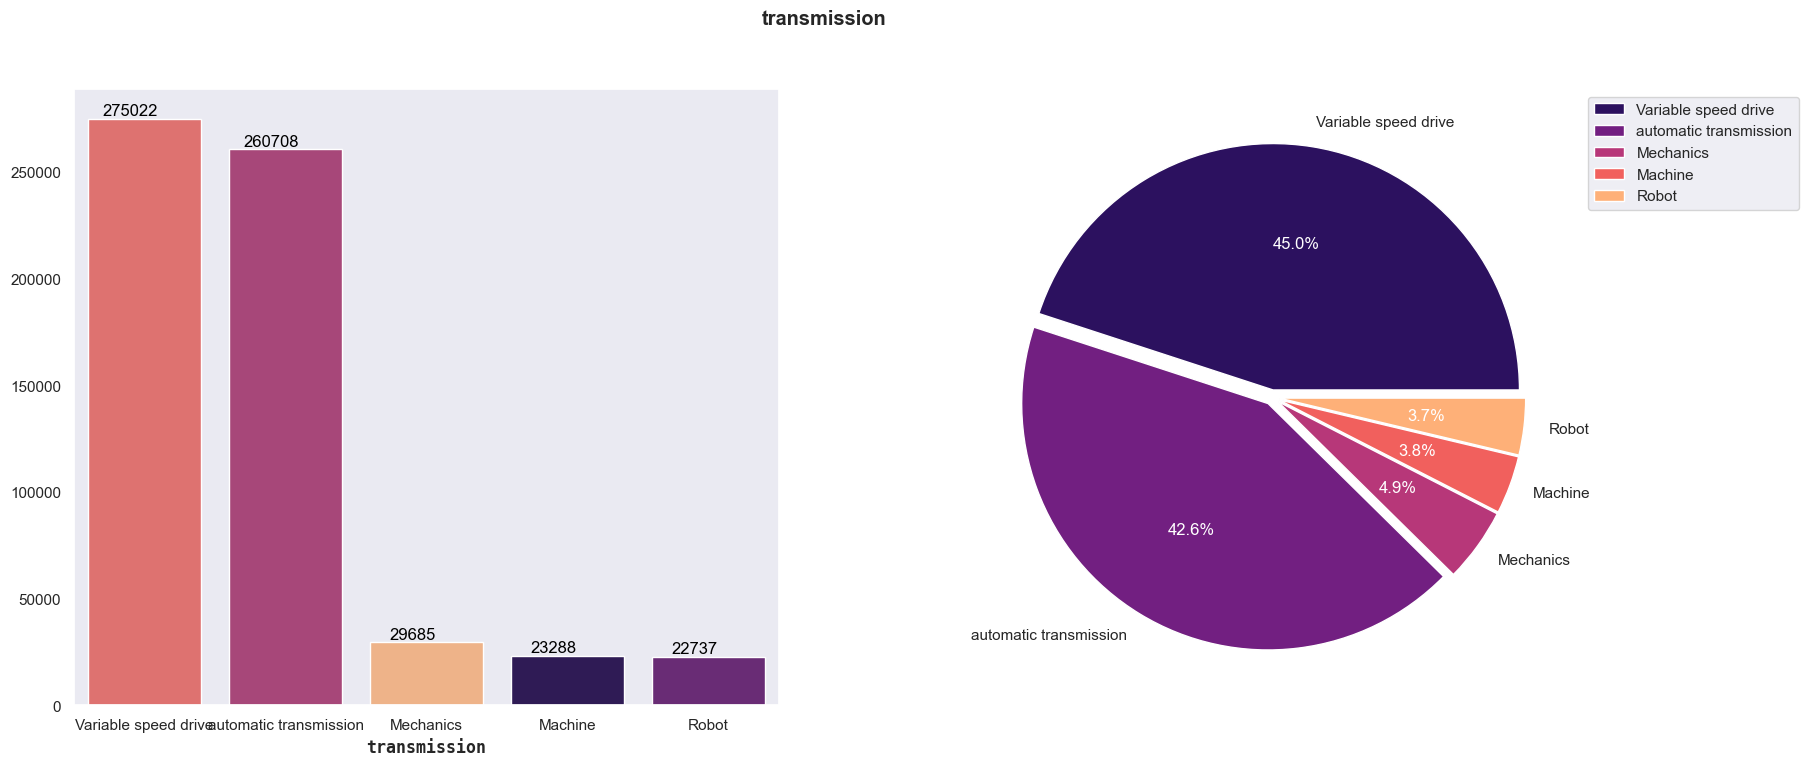

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
x=df2['transmission'].value_counts().index
y=df2['transmission'].value_counts().values.tolist()
data = df2.groupby("transmission").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('transmission', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df2['transmission'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('transmission',weight = 'bold')
plt.show()

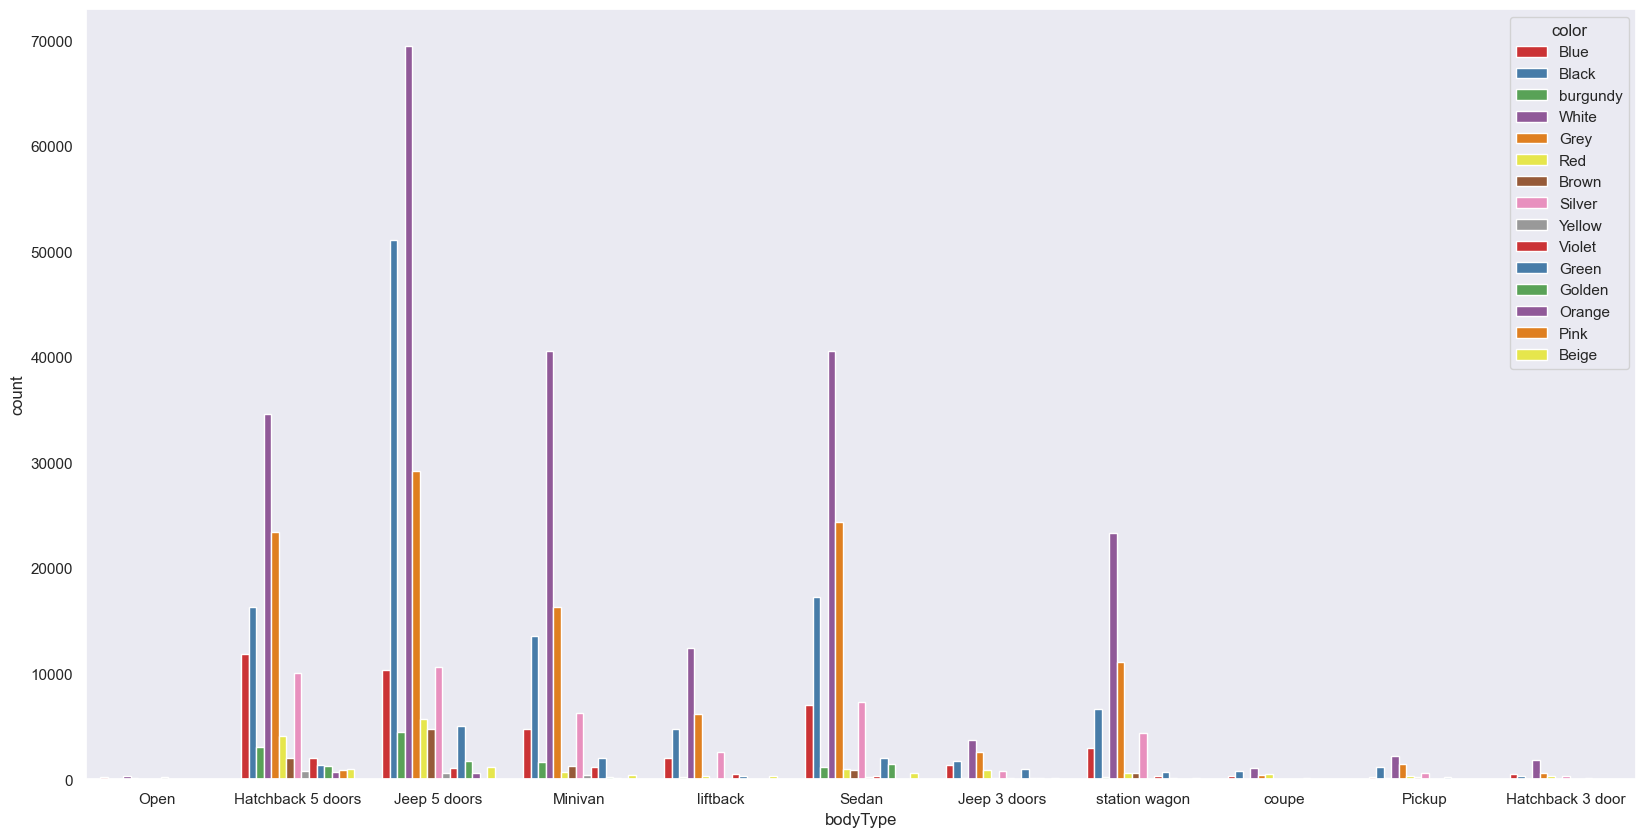

In [130]:
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="bodyType", hue="color", data=df2, palette="Set1")
plt.draw()

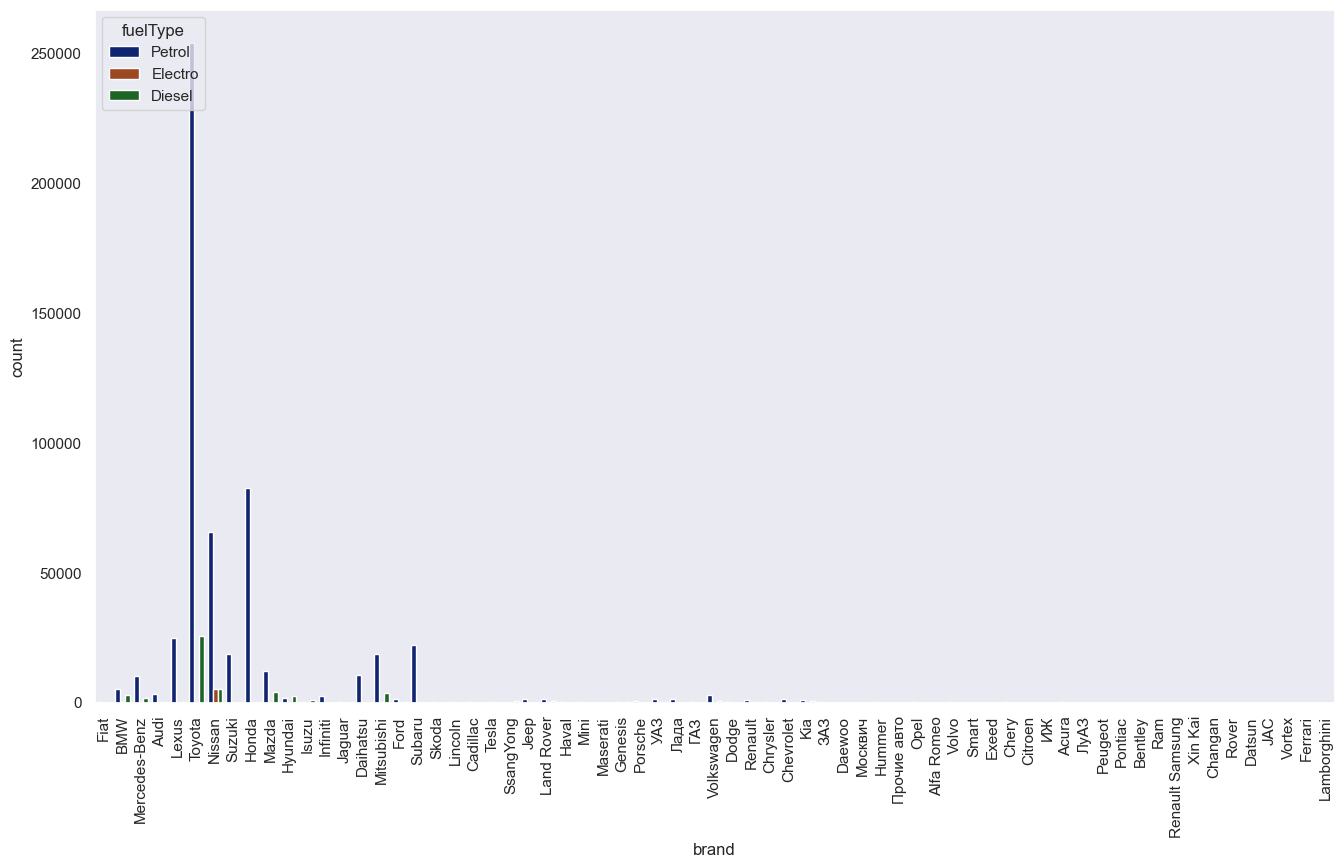

In [131]:
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='brand', hue='fuelType', data=df2)
plt.xticks(rotation=90)
plt.show()

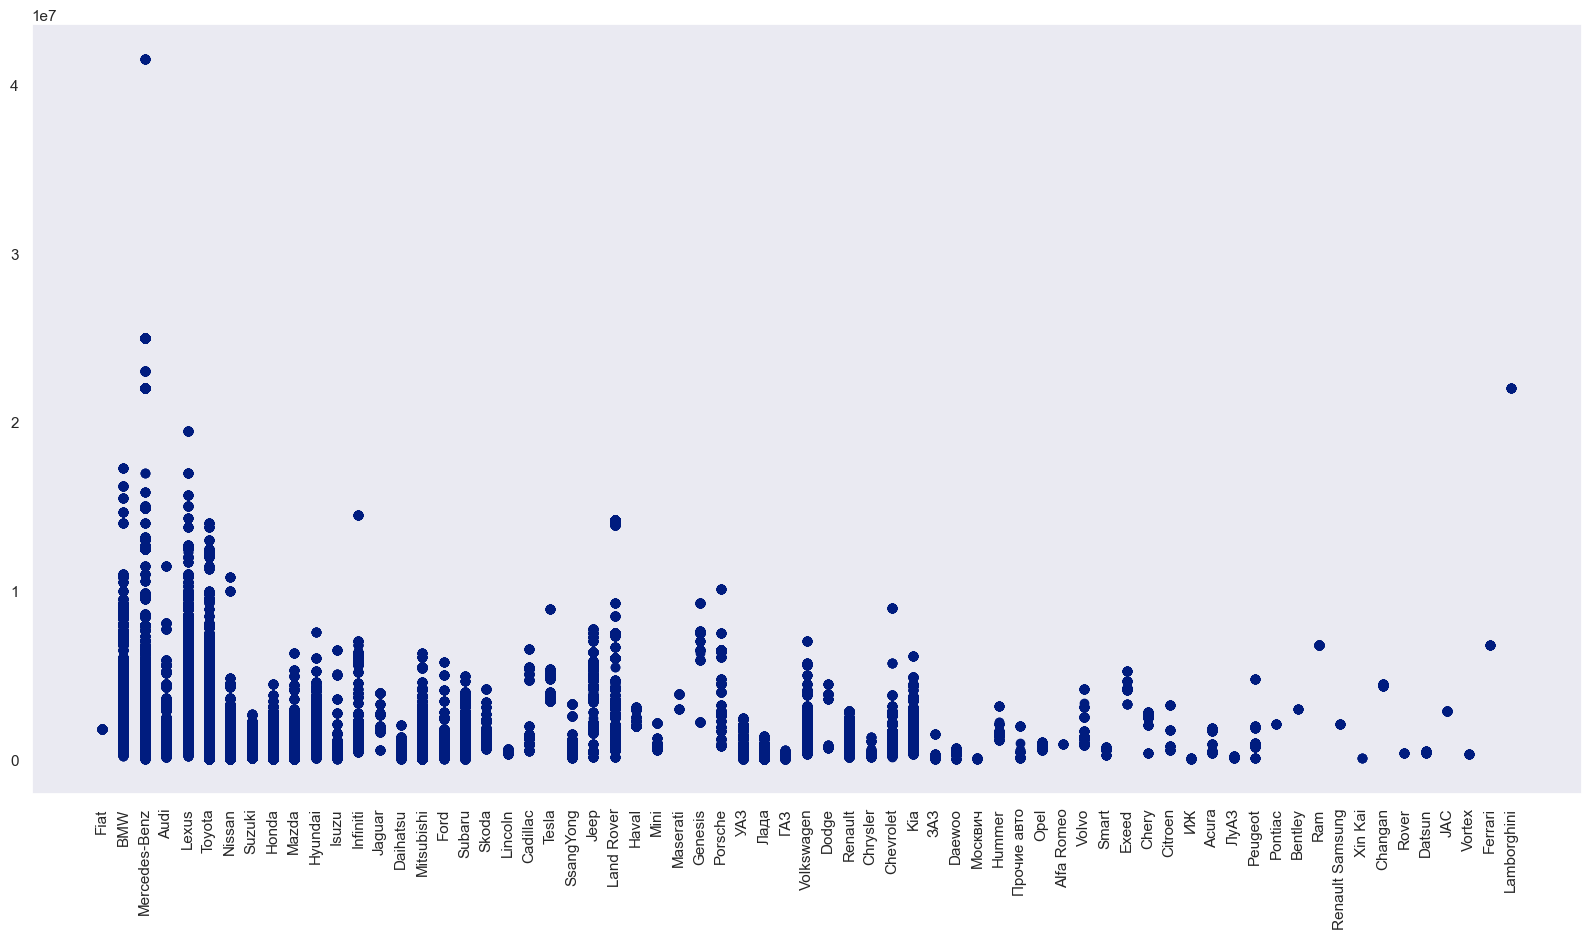

In [132]:
plt.scatter(df1.brand,df1.price)
plt.xticks(rotation=90)
plt.show()

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611440 entries, 0 to 611439
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         611440 non-null  object 
 1   name          611440 non-null  object 
 2   bodyType      611440 non-null  object 
 3   color         611440 non-null  object 
 4   fuelType      611440 non-null  object 
 5   mileage       611440 non-null  float64
 6   transmission  611440 non-null  object 
 7   power         611440 non-null  float64
 8   price         611440 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 42.0+ MB


In [134]:
# خب ما توی تعداد زیادی از ستون ها داده های غیر عددی داریم که باید اونا رو به عدد تبدیل کنیم که ماشین بفهمه چی به چیه واسه همین از کد زیر استفاده میکنیم
le = LabelEncoder()
df2['brand'] = le.fit_transform(df2['brand'])
df2['name'] = le.fit_transform(df2['name'])
df2['bodyType'] = le.fit_transform(df2['bodyType'])
df2['color'] = le.fit_transform(df2['color'])
df2['fuelType'] = le.fit_transform(df2['fuelType'])
df2['transmission'] = le.fit_transform(df2['transmission'])

df2

brand  name  bodyType  color  fuelType   mileage  transmission  power  \
0          17     2         5      2         2    8000.0             0   99.0   
1           3   854         1      1         1   12000.0             0   99.0   
2          36   320         3     14         2   57000.0             4  367.0   
3          36   311         3      1         2  200000.0             4  296.0   
4           2   599         3     12         2   67000.0             0  252.0   
...       ...   ...       ...    ...       ...       ...           ...    ...   
611435     54   583         4     12         2  120000.0             3   99.0   
611436     55   348         1     13         2   54000.0             2  140.0   
611437     54   187        10      6         2  250000.0             4  109.0   
611438     32   327         7     12         2  115000.0             4  315.0   
611439     51   299         3      2         2   90000.0             4  137.0   

          price  
0       1830000  
1       1830000  
2       4600000  
3       2999999  
4       3300000  
...         ...  
611435  1050000  
611436  1099000  
611437   365000  
611438   495000  
611439   310000  

[611440 rows x 9 columns]

In [135]:
def diagnostic_plots(df2, variable,target):
    # این فانکشن میاد و هر فیچر رو با تارگتی که تعریف میکنیم مقایسش میکنه و توی چهارتا پلات متفاوت زیر رسم میکنه

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df2[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df2[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df2[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df2)   
    plt.title('Barplot')
    
    
    plt.show()

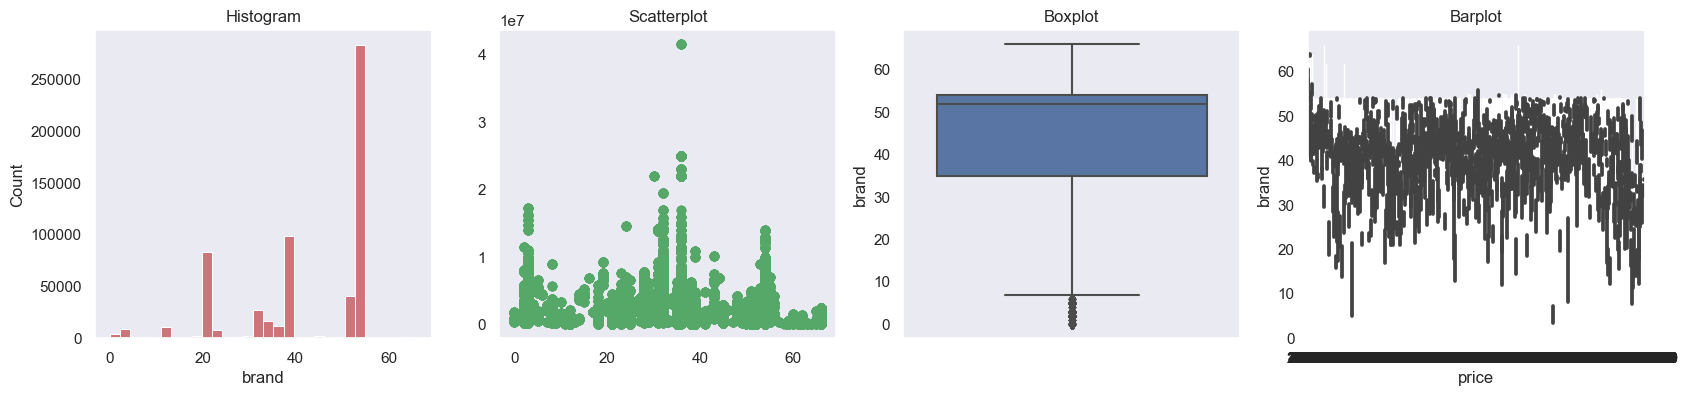

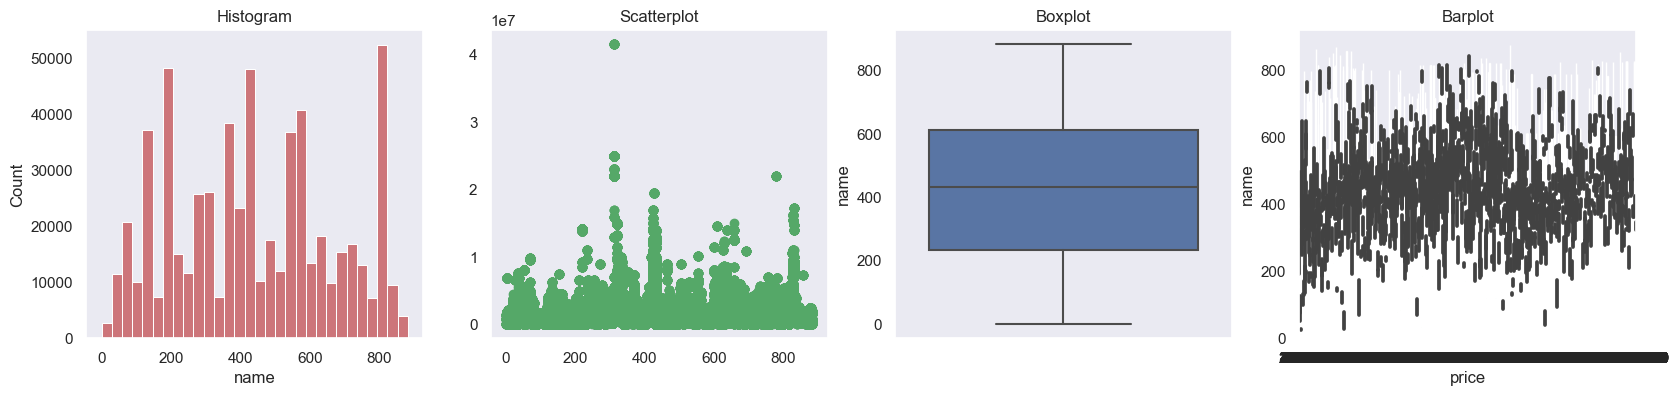

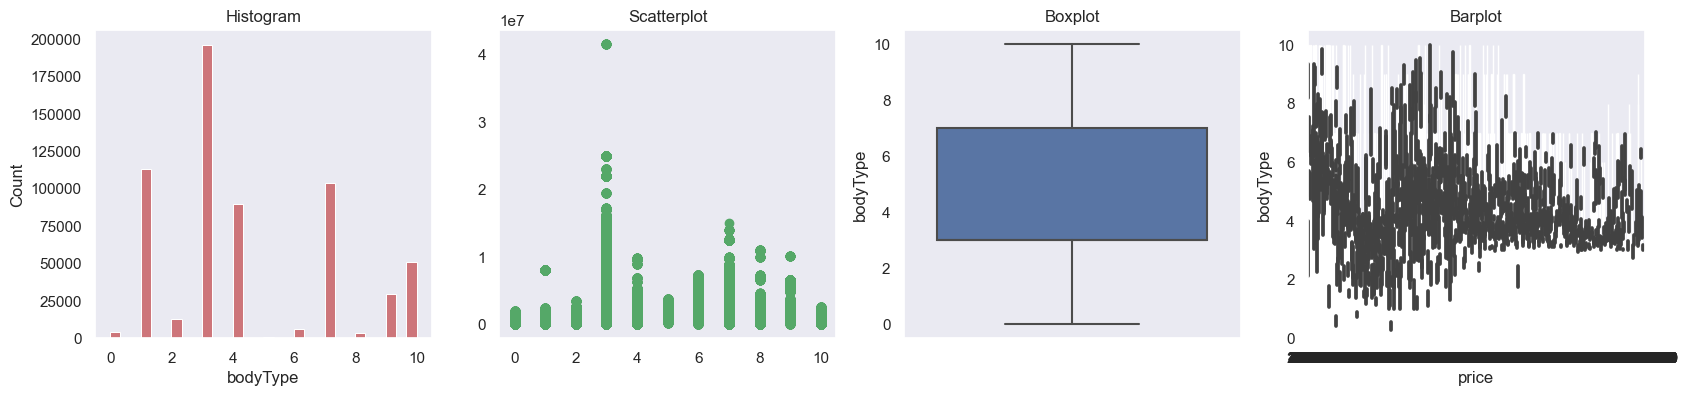

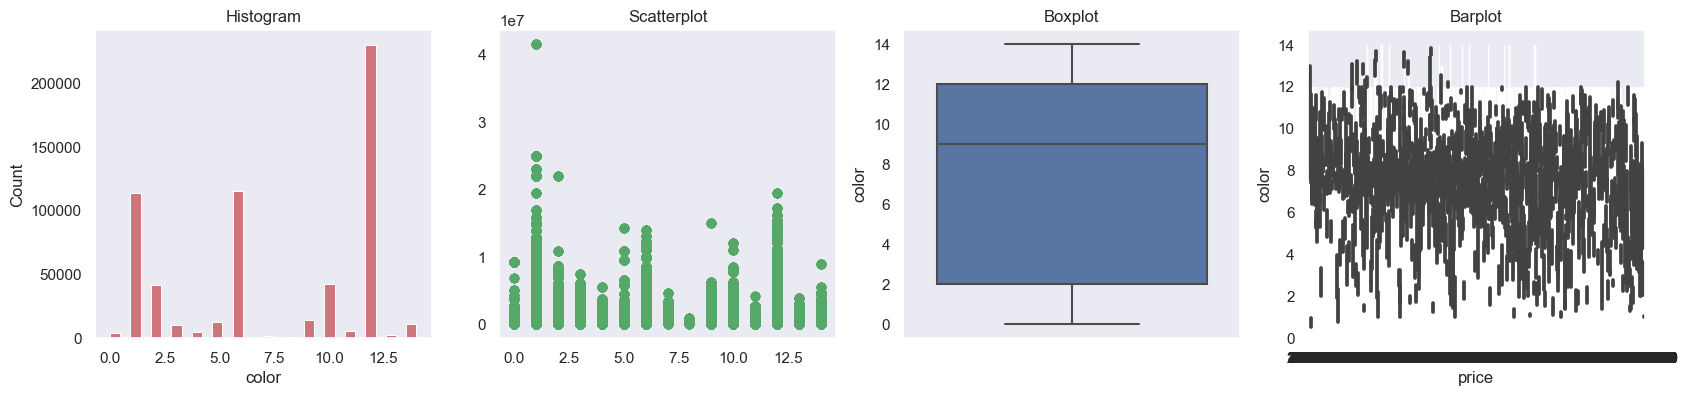

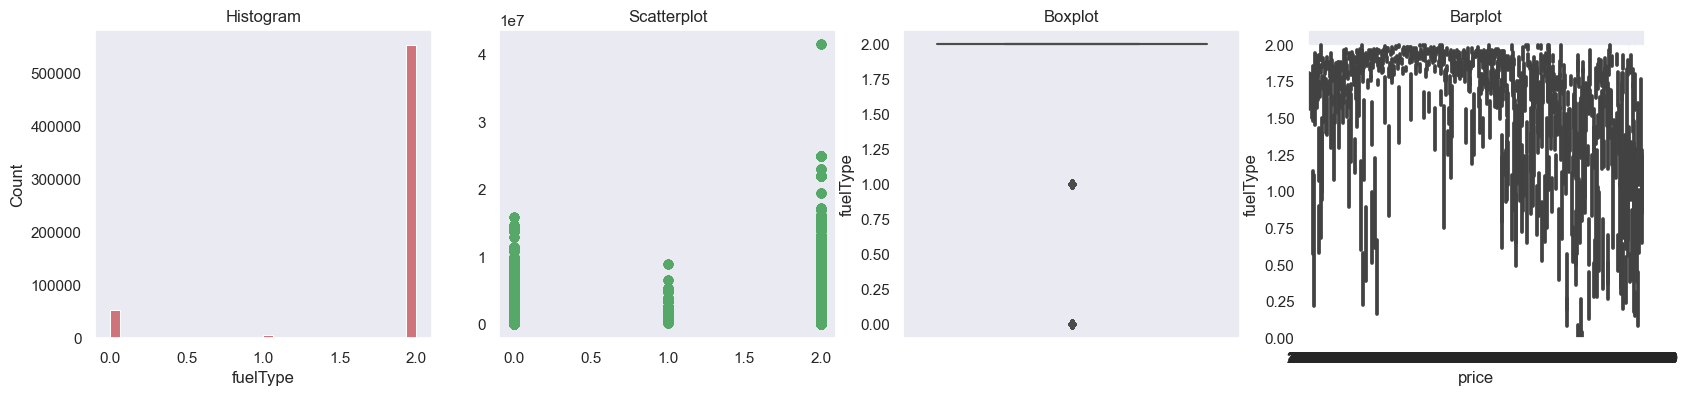

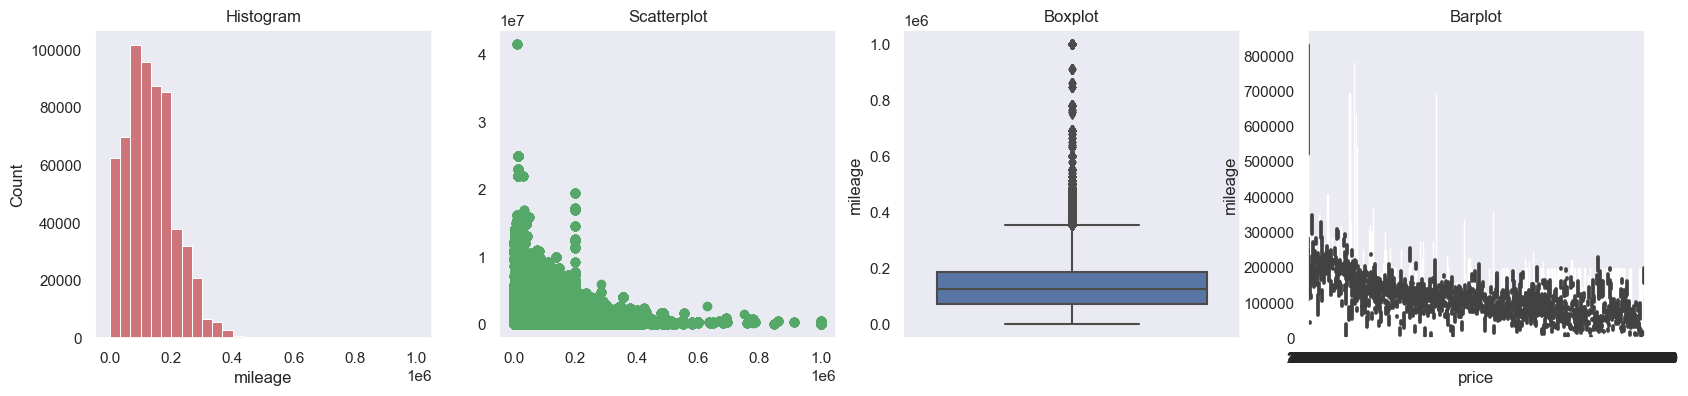

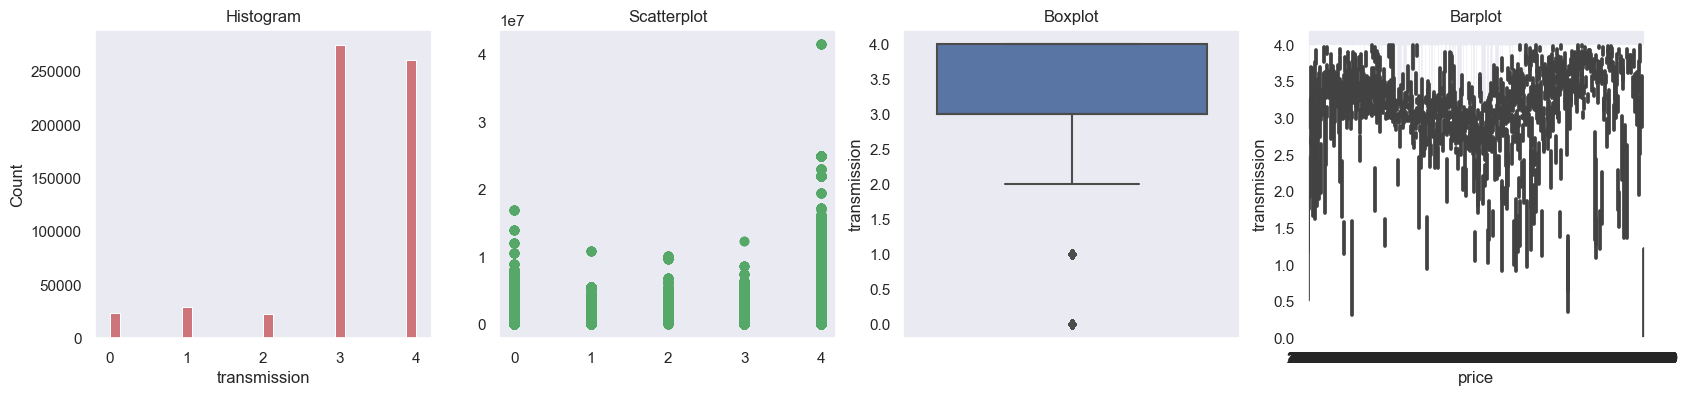

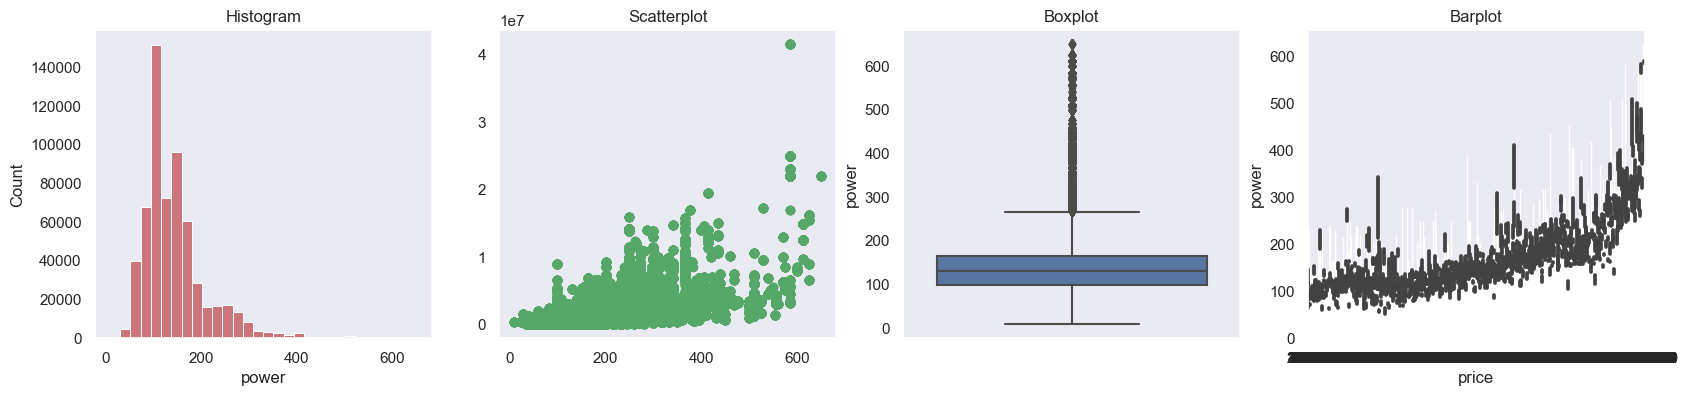

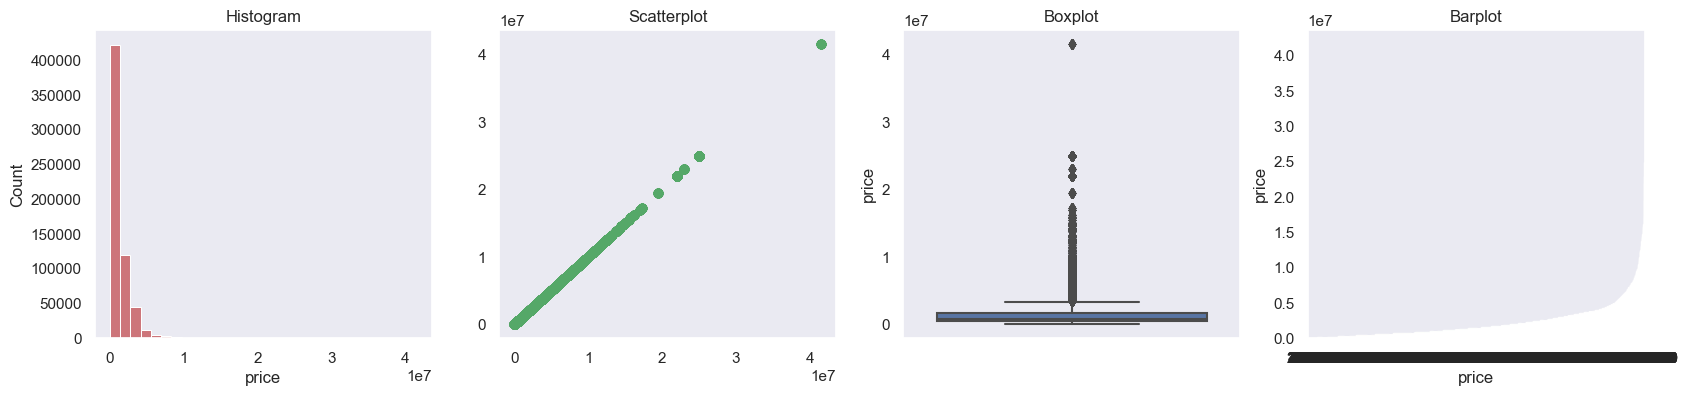

In [136]:
for variable in df2:
    diagnostic_plots(df2,variable,'price')

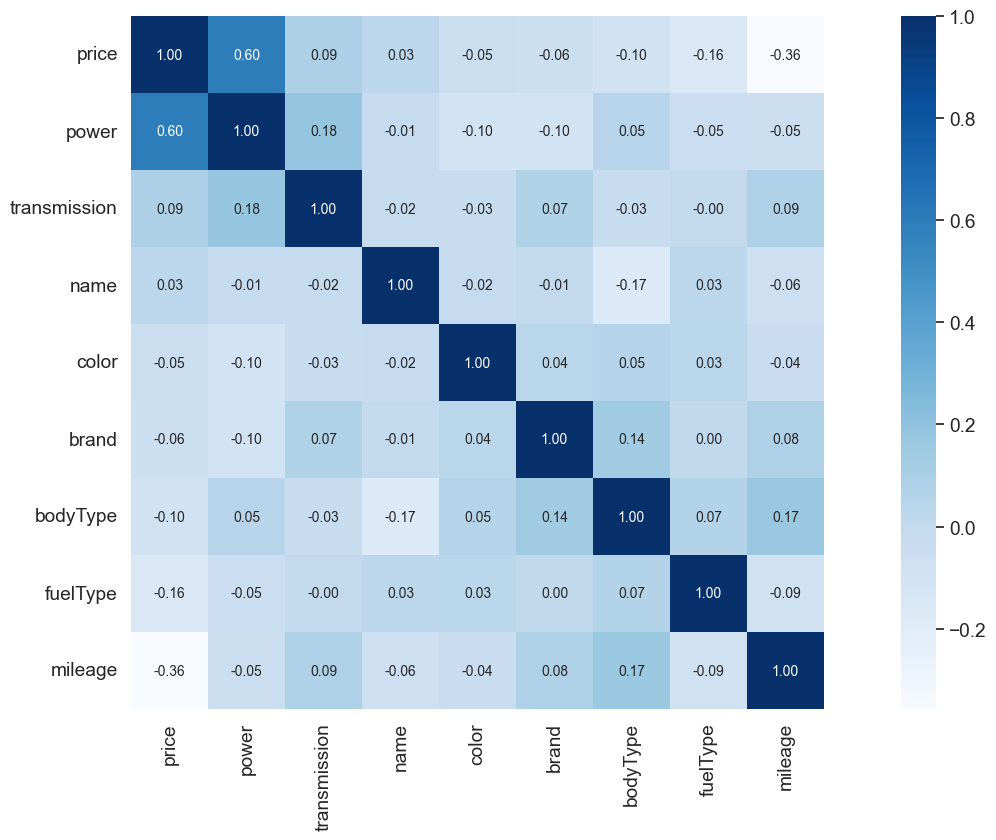

In [146]:
corr = df2.corr()
plt.figure(figsize=(20, 9))
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [147]:
pdp.ProfileReport(df2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## ساخت مدل :
## Model :

In [186]:
df3=df2.copy()
df3

brand  name  bodyType  color  fuelType   mileage  transmission  power  \
0          17     2         5      2         2    8000.0             0   99.0   
1           3   854         1      1         1   12000.0             0   99.0   
2          36   320         3     14         2   57000.0             4  367.0   
3          36   311         3      1         2  200000.0             4  296.0   
4           2   599         3     12         2   67000.0             0  252.0   
...       ...   ...       ...    ...       ...       ...           ...    ...   
611435     54   583         4     12         2  120000.0             3   99.0   
611436     55   348         1     13         2   54000.0             2  140.0   
611437     54   187        10      6         2  250000.0             4  109.0   
611438     32   327         7     12         2  115000.0             4  315.0   
611439     51   299         3      2         2   90000.0             4  137.0   

          price  
0       1830000  
1       1830000  
2       4600000  
3       2999999  
4       3300000  
...         ...  
611435  1050000  
611436  1099000  
611437   365000  
611438   495000  
611439   310000  

[611440 rows x 9 columns]

In [187]:
y=df3.pop('price')
X=df3

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.1,random_state=0)
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [189]:
kf= KFold(7)
result=cross_val_score(regressor,X_train,y_train,cv=kf)
result

array([0.49125331, 0.50126738, 0.50595958, 0.50212259, 0.49723094,
       0.50314559, 0.50691582])

In [190]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)


(550296, 8)
(550296,)
(61144, 8)
(61144,)


In [191]:
y_pred= regressor.predict(X_test)
y_pred.shape

(550296,)

In [192]:
print ('intercept: ', regressor.intercept_)
print ('Coef: ', regressor.coef_)

intercept:  954548.632128933
Coef:  [ 4.56101184e+03  8.94814311e+01 -3.37365927e+04  1.32706938e+03
 -4.15453582e+05 -6.10998854e+00  3.13280511e+02  1.29740608e+04]


In [193]:
print(metrics.r2_score(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))

0.501062936730169
1218813925724.5696
636070.8278913249


In [194]:
plt.figure(figsize=(16,6))

plt.plot(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')